# Project: Wrangling and Analyze Data

# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import os
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# loading WerateDogs twitter archive
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Programatically download image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#saving tsv to file
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [3]:
# Load the `image_predictions.tsv`
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False)

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arc.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.error.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Read tweet_json.txt line by line into a dataframe with tweet ID, retweet count, and favorite count

In [4]:
# List to load tweet_json file line by line into it
tweets_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweets_list.append(data)

In [5]:
# Converting list to a dataframe with tweet ID, retweet count, and favorite count
df = pd.DataFrame(tweets_list, columns = tweets_list[0].keys())
tweets_count = df[['id', 'retweet_count', 'favorite_count']]
tweets_count.head()

,id,retweet_count,favorite_count
0,892420643555336193,7016,33816
1,892177421306343426,5302,29353
2,891815181378084864,3483,22070
3,891689557279858688,7229,36962
4,891327558926688256,7768,35339


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**Visual assessment:** Scrolling through the data in your Jupyter Notebook

In [6]:
# Visual accessment of twitter archive
df_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Visual accessment image prediction
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
# Visual assessment of tweet_count
tweets_count

,id,retweet_count,favorite_count
0,892420643555336193,7016,33816
1,892177421306343426,5302,29353
2,891815181378084864,3483,22070
3,891689557279858688,7229,36962
4,891327558926688256,7768,35339
5,891087950875897856,2602,17824
6,890971913173991426,1667,10374
7,890729181411237888,15767,56909
8,890609185150312448,3625,24546
9,890240255349198849,6103,27980


**Programattic Assessment**

1. Twitter archive Dataframe

In [9]:
# Checking information of twitter archive df
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#checking data types of twitter archive df
df_arc.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
#Checking null values in the twitter achive df
df_arc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
#Checking duplicate values in the twitter achive df
df_arc.duplicated().any()

False

In [13]:
# Checking 20 samples of twitter archive df
df_arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2042,671538301157904385,NaN,NaN,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,None,None,None,None
540,806542213899489280,NaN,NaN,2016-12-07 16:53:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's concerned that the dandr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806542213...,11,10,Waffles,None,None,None,None
1032,745314880350101504,NaN,NaN,2016-06-21 17:58:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sugar. She excels underwater. 12/10 ph...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745314880...,12,10,Sugar,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Gingivitis Pumpernickel named Z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888...,10,10,None,None,None,None,None
853,765371061932261376,NaN,NaN,2016-08-16 02:14:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765371061...,11,10,Louie,None,None,pupper,None
196,854732716440526848,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,None,None,None,None
2083,670811965569282048,NaN,NaN,2015-11-29 03:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670811965...,10,10,Maggie,None,None,None,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None


In [14]:
# Check the twitter arcive df for outliers and statistics
df_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Rating numerator and rating denominator have outliers in numerator and denominators

In [15]:
# Checking df_arc where rating denominator is maximum
df_arc[df_arc.rating_denominator == df_arc.rating_denominator.max()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [16]:
# Checking df_arc where rating denominator is minimum
df_arc[df_arc.rating_denominator == df_arc.rating_denominator.min()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
# Check df_arc where rating denominator is greater than 10
df_arc[df_arc.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [18]:
# Check df_arc where rating numerator is greater than 20
df_arc[df_arc.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [19]:
# Checking if either the numerator or denominator values are entered incorrectly
pd.set_option('display.max_colwidth', 500)
df_arc[df_arc.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator','rating_denominator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [20]:
# Value counts of source column
df_arc['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

2. Image Prediction Dataframe

In [21]:
# Checking information of img_pred
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Check the statistics of img_pred for outliers and other useful stats
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Checking 20 samples of image predictions df
img_pred.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1997,875021211251597312,https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg,2,West_Highland_white_terrier,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
570,678396796259975168,https://pbs.twimg.com/media/CWomSU_XIAAUYiK.jpg,2,Pembroke,0.956180,True,Cardigan,0.031803,True,Chihuahua,0.006276,True
1180,738166403467907072,https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg,2,keeshond,0.878886,True,Norwegian_elkhound,0.086659,True,malamute,0.021280,True
766,689154315265683456,https://pbs.twimg.com/media/CZBeMMVUwAEdVqI.jpg,1,cocker_spaniel,0.816044,True,golden_retriever,0.054135,True,Airedale,0.030648,True
59,667119796878725120,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,True,Chihuahua,0.057866,True,toy_poodle,0.039125,True
537,676948236477857792,https://pbs.twimg.com/media/CWUA1GFW4AAowiq.jpg,1,guenon,0.611603,False,macaque,0.135176,False,squirrel_monkey,0.083247,False
448,674690135443775488,https://pbs.twimg.com/media/CVz7FxXWUAAlTRP.jpg,1,tick,0.242538,False,nail,0.212589,False,screw,0.172838,False


In [24]:
# Checking image num value_counts
img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
# Checking the observations where p1_conf is equal to 1
img_pred[img_pred['p1_conf'] == 1.0]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [26]:
# Checking for duplicate tweet ids
img_pred.tweet_id.duplicated().any()

False

In [27]:
# Checking for duplicate jpg_url
img_pred[img_pred.jpg_url.duplicated()].jpg_url.values

array([ 'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg',
       'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg',
       'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg',
       'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg',
       'https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg',
       'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg',
       'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg',
       'https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg',
       'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg',
       'https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg',
       'https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg',
       'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg',
       'https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg',
       'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg',
       'https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg',
       'https://pbs

In [28]:
# Checking all tweet ids with duplicate jpg_url
img_pred[img_pred.jpg_url.apply(lambda x: x in img_pred[img_pred.jpg_url.duplicated()].jpg_url.values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


There are a lot of duplicated jpg_urls

3. Tweets count DataFrame

In [29]:
# Checking tweets_count info
tweets_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
id                2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [30]:
# Checking tweets count statistics
tweets_count.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2473.169746,7059.532875
std,6.820795e+16,4188.586687,10970.416620
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.000000
50%,7.178418e+17,1149.000000,3053.000000
75%,7.986547e+17,2864.500000,8612.000000
max,8.924206e+17,70813.000000,145003.000000


In [31]:
# Checking tweets count for duplicates
tweets_count.duplicated().any()

False

In [32]:
# Checking where retweet_count and favorite_count are duplicated together
tweets_count[(tweets_count.retweet_count.duplicated()) & (tweets_count.favorite_count.duplicated())]

,id,retweet_count,favorite_count
542,802624713319034886,2730,0
576,798697898615730177,6106,0
606,795076730285391872,5108,15364
649,790227638568808452,3318,0
708,782021823840026624,5745,0
721,780496263422808064,3429,0
813,767754930266464257,4965,15005
822,766078092750233600,2426,0
908,753375668877008896,2140,7158
958,749064354620928000,1409,4508


### Quality issues

#### Twitter archive dataframe
1. There are 6 columns with missing values namely; ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id```, ```retweeted_status_timestamp```, ```expanded_urls```

2. ```rating_numerator``` has some extreme high values which are unrealistic. ```rating_denominator``` has values other than 10

3. There are observations of incorrectly entered ```rating_numerator``` values

4. Values in ```source``` column are not human readable

5. Erroneous data types; columns; ```tweet_id```, ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id``` should be string. ```dog_stage``` column should be categorical and ```timestamp``` should be in datetime datatype.

6. ```name``` column contain unusual and none names


#### Image predictions dataframe

7. Duplicate image predictions present for duplicate ```jpg_url``` with different tweet ids.

8.  Value contains both upper and lower case in p1, p2, and p3 columns, Use of _ instead of space the column values



### Tweets count dataframe

8. ```tweet id``` with inconsistent column names, ```id``` and ```tweet id```
9. The ```retweet_count``` and ```favorite_count``` values are duplicated together in some rows

### Tidiness issues
### Twitter archive dataframe
1. Remove unneccessary columns
2. ```dog_stage``` in 4 columns instead of 1; ```doggo```, ```floofer```, ```pupper```, ```puppo```
3. Merge tables ```df_arc```, ```img_pred``` and ```tweets_count``` together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
df_arc_clean = df_arc.copy()
img_pred_clean = img_pred.copy()
tweets_count_clean = tweets_count.copy()

### Issue 1:
There are 6 columns with missing values namely; ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id```, ```retweeted_status_timestamp```, ```expanded_urls```

#### Define:
Drop the columns ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id``` , and ```retweeted_status_timestamp``` in the ```df_arc_clean```; fill the missing values of ```expanded_urls``` column using tweet_id which isthe last part of the tweet URL after "status/"

#### Code

In [7]:
# Drop the unnecessary columns
df_arc_clean = df_arc_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [8]:
# Fill the missing values in expanded_url
df_arc_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + df_arc_clean.tweet_id.astype(str)

#### Test

In [9]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2:
dog_stage in 4 columns instead of 1; doggo, floofer, pupper, puppo

#### Define
Replace 'None' with empty string. Melt 'doggo', 'floofer', 'pupper', 'puppo' columns into new column 'dog_stage' and drop the old columns

#### Code

In [10]:
# Replace the None with empty string
df_arc_clean[['doggo', 'floofer', 'pupper', 'puppo']] = df_arc_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [11]:
#create a new column dog_stage

df_arc_clean['dog_stage'] = df_arc_clean.doggo + df_arc_clean.floofer + df_arc_clean.pupper + df_arc_clean.puppo

df_arc_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [12]:
#replace blank cells with NaN
df_arc_clean.dog_stage.replace('',np.nan, inplace=True)
df_arc_clean.dog_stage.value_counts()


pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [13]:
# drop the unnecessary columns
df_arc_clean.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)

#### Test

In [14]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             380 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


### Issue #3

```tweet_id``` with inconsistent column names; ```id``` and ```tweet id```

#### Define

Rename ```id``` column in ```tweets_count_clean``` to ```tweet_id```

#### Code

In [15]:
tweets_count_clean = tweets_count_clean.rename(columns = {'id': 'tweet_id'})

#### Test

In [16]:
tweets_count_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #4

Merge table ```df_arc``` and ```tweets_count``` together

#### Define

Merge the tables ```df_arc_clean``` and ```tweets_count_clean``` on ```tweet_id``` column



#### Code

In [17]:
df_arc_clean = pd.merge(df_arc_clean, tweets_count_clean, on = 'tweet_id', how = 'inner')

#### Test

In [18]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 11 columns):
tweet_id              2327 non-null int64
timestamp             2327 non-null object
source                2327 non-null object
text                  2327 non-null object
expanded_urls         2327 non-null object
rating_numerator      2327 non-null int64
rating_denominator    2327 non-null int64
name                  2327 non-null object
dog_stage             375 non-null object
retweet_count         2327 non-null int64
favorite_count        2327 non-null int64
dtypes: int64(5), object(6)
memory usage: 218.2+ KB


### Issue #5

```timestamp``` should be in datetime datatype.

#### Define

Convert ```timestamp``` datatype to datetime

#### Code

In [19]:
# Convert timestamp datatype to datetime
df_arc_clean.timestamp = pd.to_datetime(df_arc_clean.timestamp)

#### Test

In [20]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 11 columns):
tweet_id              2327 non-null int64
timestamp             2327 non-null datetime64[ns]
source                2327 non-null object
text                  2327 non-null object
expanded_urls         2327 non-null object
rating_numerator      2327 non-null int64
rating_denominator    2327 non-null int64
name                  2327 non-null object
dog_stage             375 non-null object
retweet_count         2327 non-null int64
favorite_count        2327 non-null int64
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 218.2+ KB


### Issue #6:
```rating_numerator``` has some extreme high values which are unrealistic, and ```rating_denominator``` has values other than 10. There are observations of incorrectly entered rating_numerator values

#### Define
Change the observations with incorrect denominator rating to 10 which is the standard for WeRateDogs and change the numerator rating accordingly

#### Code

In [21]:
# Check df_arc_clean where rating denominator is other than 10
pd.set_option('display.max_colwidth', 500)
df_arc_clean[['text','expanded_urls', 'rating_numerator', 'rating_denominator']].query('rating_denominator != 10')

,text,expanded_urls,rating_numerator,rating_denominator
297,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",https://twitter.com/dog_rates/status/835246439529840640,960,0
326,@docmisterio account started on 11/15/15,https://twitter.com/dog_rates/status/832088576586297345,11,15
415,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,https://twitter.com/dog_rates/status/820690176645140481,84,70
497,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,https://twitter.com/dog_rates/status/810984652412424192,24,7
875,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024,165,150
1040,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",https://twitter.com/dog_rates/status/740373189193256964,9,11
1092,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288,204,170
1137,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656,4,20
1174,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801,50,50
1200,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249,99,90


In [22]:
# Check the incorrectly entered numerator values
pd.set_option('display.max_colwidth', 500)
df_arc_clean[df_arc_clean.text.str.contains(r'(\d+\.\d*\/\d+)')][['text', 'rating_numerator', 'rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator,rating_denominator
44,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
324,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
675,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
742,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1661,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1684,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [23]:
# Replace the incorrect ratings with correct ratings
df_arc_clean.loc[297, 'rating_numerator':'rating_denominator'] = [13, 10]
df_arc_clean.loc[326, 'rating_numerator':'rating_denominator'] = [11, 10]
df_arc_clean.loc[1040, 'rating_numerator':'rating_denominator'] = [14, 10]
df_arc_clean.loc[1137, 'rating_numerator':'rating_denominator'] = [13, 10]
df_arc_clean.loc[1174, 'rating_numerator':'rating_denominator'] = [11, 10]
df_arc_clean.loc[1634, 'rating_numerator':'rating_denominator'] = [10, 10]
df_arc_clean.loc[2306, 'rating_numerator':'rating_denominator'] = [9, 10]
df_arc_clean.loc[44, 'rating_numerator':'rating_denominator'] = [13.5, 10]
df_arc_clean.loc[324, 'rating_numerator':'rating_denominator'] = [9.75, 10]
df_arc_clean.loc[675, 'rating_numerator':'rating_denominator'] = [9.75, 10]
df_arc_clean.loc[742, 'rating_numerator':'rating_denominator'] = [11.27, 10]
df_arc_clean.loc[1661, 'rating_numerator':'rating_denominator'] = [9.5, 10]
df_arc_clean.loc[1684, 'rating_numerator':'rating_denominator'] = [11.26, 10]


In [24]:
# Drop the other incorrect ratings
df_arc_clean= df_arc_clean.drop([415, 497, 875, 1092, 1200, 1226, 1246, 1323, 1405, 1570, 1606, 1607, 1635, 1750, 1814], axis = 0)

In [25]:
# Checking where the rating numerator is greater than or equal to 20
pd.set_option('display.max_colwidth', 500)
df_arc_clean[['text','expanded_urls', 'rating_numerator', 'rating_denominator']].query('rating_numerator >= 20')

,text,expanded_urls,rating_numerator,rating_denominator
179,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,https://twitter.com/dog_rates/status/855862651834028034,420.0,10
180,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",https://twitter.com/dog_rates/status/855860136149123072,666.0,10
276,@markhoppus 182/10,https://twitter.com/dog_rates/status/838150277551247360,182.0,10
951,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128,1776.0,10
2045,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840,420.0,10


In [26]:
# Drop the other incorrect ratings
df_arc_clean= df_arc_clean.drop([179, 180, 276, 951, 2045], axis = 0)

#### Test

In [27]:
df_arc_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [28]:
df_arc_clean.query('rating_numerator >= 20')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [29]:
# check for any row with denominator 0
df_arc_clean.query('rating_denominator == 0')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [30]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 0 to 2326
Data columns (total 11 columns):
tweet_id              2307 non-null int64
timestamp             2307 non-null datetime64[ns]
source                2307 non-null object
text                  2307 non-null object
expanded_urls         2307 non-null object
rating_numerator      2307 non-null float64
rating_denominator    2307 non-null int64
name                  2307 non-null object
dog_stage             375 non-null object
retweet_count         2307 non-null int64
favorite_count        2307 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 216.3+ KB


### Issue #7

```name``` column contain unusual and none names

#### Define

Replace names with a, an, such, None with unknown and make name title case

#### Code

In [31]:
# Check name column
df_arc_clean.name.value_counts()

None            716
a                54
Oliver           11
Cooper           11
Charlie          11
Lucy             10
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
an                7
Buddy             7
Toby              7
Bailey            7
Koda              6
Stanley           6
Milo              6
Leo               6
Rusty             6
Jax               6
Oscar             6
Scout             6
Dave              6
Jack              6
Bella             6
Chester           5
               ... 
Godzilla          1
Scott             1
Napolean          1
Humphrey          1
Mike              1
Zeus              1
Kellogg           1
Snickers          1
Oreo              1
Jerome            1
Craig             1
Timber            1
Cleopatricia      1
Tyrus             1
Fabio             1
Julius            1
Clarq             1
Dook              1
Angel             1


In [32]:
# Check for invalid names
df_arc_clean[df_arc_clean.name.str.islower() == True].name.value_counts()

a               54
the              8
an               7
very             5
one              4
just             4
quite            3
mad              2
actually         2
getting          2
not              2
such             1
space            1
light            1
life             1
officially       1
my               1
old              1
by               1
his              1
infuriating      1
incredibly       1
unacceptable     1
all              1
Name: name, dtype: int64

In [33]:
# Replace the invalid names with 'None'
for n in df_arc_clean.name:
    if n.islower() == True:
        df_arc_clean.name = df_arc_clean.name.replace(n, 'None')

In [34]:
# Replace 'None' in the name column with NaN
df_arc_clean.name = df_arc_clean.name.replace('None', np.nan)

#### Test

In [35]:
df_arc_clean.name.value_counts()

Charlie         11
Cooper          11
Oliver          11
Penny           10
Lucy            10
Lola            10
Tucker          10
Winston          9
Bo               9
Sadie            8
Daisy            7
Toby             7
Buddy            7
Bailey           7
Oscar            6
Scout            6
Stanley          6
Milo             6
Koda             6
Jax              6
Leo              6
Dave             6
Rusty            6
Jack             6
Bella            6
Alfie            5
Bentley          5
George           5
Louis            5
Finn             5
                ..
Tonks            1
Arya             1
Godzilla         1
Scott            1
Napolean         1
Humphrey         1
Zeus             1
Brat             1
Kellogg          1
Leonidas         1
Timber           1
Cleopatricia     1
Tyrus            1
Fabio            1
Julius           1
Clarq            1
Dook             1
Oreo             1
Angel            1
Strider          1
Tripp            1
Anna        

In [36]:
df_arc_clean[df_arc_clean.name.str.islower() == True].name

Series([], Name: name, dtype: object)

In [37]:
df_arc_clean.name.isnull().sum()

822

### Issue #8

Values in the ```source``` column are not human readable

#### Define

Replace the values in ```source``` column with strings defining them

#### Code

In [38]:
# Check the source column
df_arc_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2174
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [39]:
# Replace values in the source column with readable text
df_arc_clean.source = df_arc_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_arc_clean.source = df_arc_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_arc_clean.source = df_arc_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_arc_clean.source = df_arc_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [40]:
df_arc_clean.source.value_counts()

Twitter for iPhone     2174
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                 9
Name: source, dtype: int64

### Issue #9

```image predictons``` data contains both upper and lower case in p1, p2, and p3 columns, Use of _ instead of space the column values

#### Define

Replace _ with '  ' and change the values to upper case in p1, p2 and p3

#### Code

In [41]:
img_pred_clean.p1 = img_pred_clean.p1.str.replace('_', ' ').str.capitalize()
img_pred_clean.p2 = img_pred_clean.p2.str.replace('_', ' ').str.capitalize()
img_pred_clean.p3 = img_pred_clean.p3.str.replace('_', ' ').str.capitalize()


#### Test

In [42]:
img_pred_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,Collie,Shetland sheepdog
1,Redbone,Miniature pinscher,Rhodesian ridgeback
2,German shepherd,Malinois,Bloodhound
3,Rhodesian ridgeback,Redbone,Miniature pinscher
4,Miniature pinscher,Rottweiler,Doberman


### Issue #10

Duplicate image predictions present for duplicate ```jpg_url``` with different tweet ids.

#### Define

Drop duplicated jpg_url values

#### Code

In [43]:
img_pred_clean = img_pred_clean.drop_duplicates(['jpg_url'])

#### Test

In [44]:
img_pred_clean.jpg_url.duplicated().any()

False

In [45]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
df_arc_master = pd.merge(df_arc_clean, img_pred_clean, on = 'tweet_id', how = 'inner')

In [48]:
df_arc_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [2]:
df_tweets_master = pd.read_csv('twitter_archive_master.csv')

In [3]:
df_tweets_master.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7016,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,5302,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [4]:
df_tweets_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 22 columns):
tweet_id              1983 non-null int64
timestamp             1983 non-null object
source                1983 non-null object
text                  1983 non-null object
expanded_urls         1983 non-null object
rating_numerator      1983 non-null float64
rating_denominator    1983 non-null int64
name                  1341 non-null object
dog_stage             308 non-null object
retweet_count         1983 non-null int64
favorite_count        1983 non-null int64
jpg_url               1983 non-null object
img_num               1983 non-null int64
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null bool
p2                    1983 non-null object
p2_conf               1983 non-null float64
p2_dog                1983 non-null bool
p3                    1983 non-null object
p3_conf               1983 non-null floa

In [5]:
# Convert timestamp datatype to datetime
df_tweets_master.timestamp = pd.to_datetime(df_tweets_master.timestamp)

In [6]:
# Convert tweet_id datatype to string
df_tweets_master.tweet_id = df_tweets_master.tweet_id.astype(str)

In [7]:
# Convert dog_stage datatype to category
df_tweets_master.dog_stage = df_tweets_master.dog_stage.astype('category')

In [8]:
df_tweets_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 22 columns):
tweet_id              1983 non-null object
timestamp             1983 non-null datetime64[ns]
source                1983 non-null object
text                  1983 non-null object
expanded_urls         1983 non-null object
rating_numerator      1983 non-null float64
rating_denominator    1983 non-null int64
name                  1341 non-null object
dog_stage             308 non-null category
retweet_count         1983 non-null int64
favorite_count        1983 non-null int64
jpg_url               1983 non-null object
img_num               1983 non-null int64
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null bool
p2                    1983 non-null object
p2_conf               1983 non-null float64
p2_dog                1983 non-null bool
p3                    1983 non-null object
p3_conf               1983 no

In [9]:
# Checking statistics of the tweets_master dataframe
df_tweets_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1983.000000,1983.0,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03,1.983000e+03
mean,10.557630,10.0,2237.427131,7690.027231,1.203732,0.594041,1.346289e-01,6.031711e-02
std,2.185737,0.0,4025.758300,11396.100097,0.561861,0.272305,1.007327e-01,5.100591e-02
min,0.000000,10.0,11.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,489.500000,1581.000000,1.000000,0.361531,5.409535e-02,1.608055e-02
50%,11.000000,10.0,1059.000000,3431.000000,1.000000,0.587764,1.180890e-01,4.952370e-02
75%,12.000000,10.0,2551.500000,9560.000000,1.000000,0.846807,1.955655e-01,9.180755e-02
max,15.000000,10.0,70813.000000,145003.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
df_tweets_master.name.isnull().sum() / df_tweets_master.shape[0] * 100

32.375189107413007

In [11]:
df_tweets_master.dog_stage.isnull().sum() / df_tweets_master.shape[0] * 100

84.467977811396878

### Insights:
1. About 84% of the dog_stage is missing

2. About 32% of the dog has no name

3. The maximum retweet count is 70813, minimun is 11 and mean is 2237.42

4. 90% of the tweets are sent via iphone, followed by web and few by tweet deck

5. Pupper is the most popular among the dog stages.

### Visualization

#### Question 1
What is the most popular dog stage distribution?

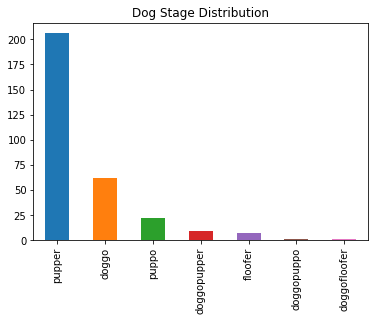

In [16]:
df_tweets_master.dog_stage.value_counts().plot(kind='bar',title='Dog Stage Distribution', figsize=(6,4))

The most popular dog stage is pupper which is a younger dog, followed by doggo and puppo.

#### Question 2
Which is the most popular tweet source?

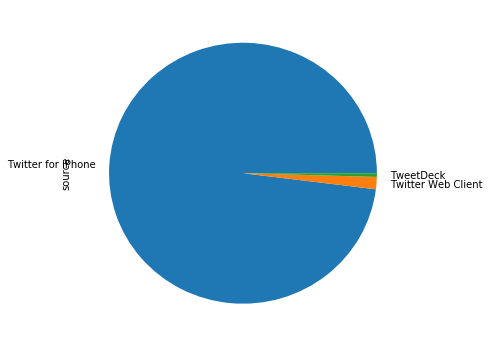

In [22]:
df_tweets_master.source.value_counts().plot(kind='pie', figsize=(6,6))

#### Question 3
Is there any relationship between ```retweet_count``` and ```favorite_count```?

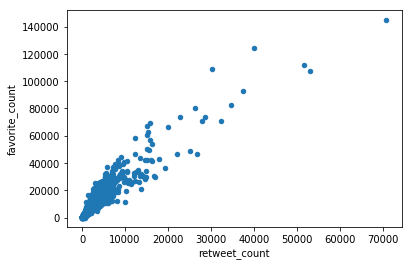

In [24]:
df_tweets_master.plot(x='retweet_count', y='favorite_count', kind='scatter')

There is a positive correlation between ```retweet_count``` and ```favorite_count```.